# Question 4
## Part A
### Calculate Gradient and Hessien of f(x)
---


### Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt


In [35]:
def plot_optimization(traj, method_name):
    traj = np.array(traj)
    f_values = [f(x) for x in traj]
    distances = [np.linalg.norm(x - np.array([1, 1])) for x in traj]

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(f_values, label='Function Value')
    plt.title(f'{method_name} Optimization')
    plt.ylabel('f(x)')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(distances, label='Distance to Optimal Point')
    plt.xlabel('Iteration')
    plt.ylabel('Distance')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Calculate f(x) and gradient and hessien

In [36]:
def f(x):
    return 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

def grad_f(x):
    return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]), 200 * (x[1] - x[0]**2)])

def hessian_f(x):
    return np.array([[-400 * (x[1] - x[0]**2) + 1200 * x[0]**2 + 2, -400 * x[0]], [-400 * x[0], 200]])

## Part B

### Steepest Descent

In [37]:
def steepest_descent(x0, lr, tol, max_iter):
    x = x0
    trajectory = [x]
    for i in range(max_iter):
        grad = grad_f(x)
        x = x - lr * grad
        trajectory.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return x, trajectory


### Newthon Method

In [38]:
def newton_method(x0, tol, max_iter):
    x = x0
    trajectory = [x]
    for i in range(max_iter):
        grad = grad_f(x)
        hessian = hessian_f(x)
        try:
            delta_x = np.linalg.solve(hessian, grad)
        except np.linalg.LinAlgError:
            print("Hessian is non-invertible at iteration:", i)
            break
        x = x - delta_x
        trajectory.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return x, trajectory

## Part C

### Results

- Both methods are good. Steepest Descent is very good for the begining where we are far away from the optimal. And Nethon's method is also very good when we are close to the answer. As we can see after around 200000 stepest descent got so close to (1, 1) but newthon was so faster.

Steepest Descent Result: [0.9980954 0.9961868]
Newton's Method Result: [1. 1.]


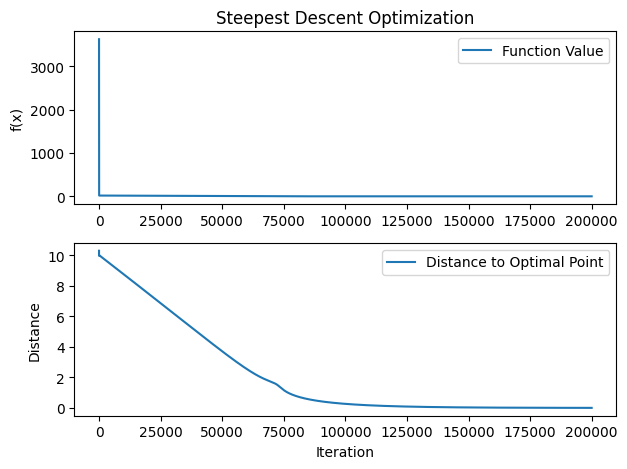

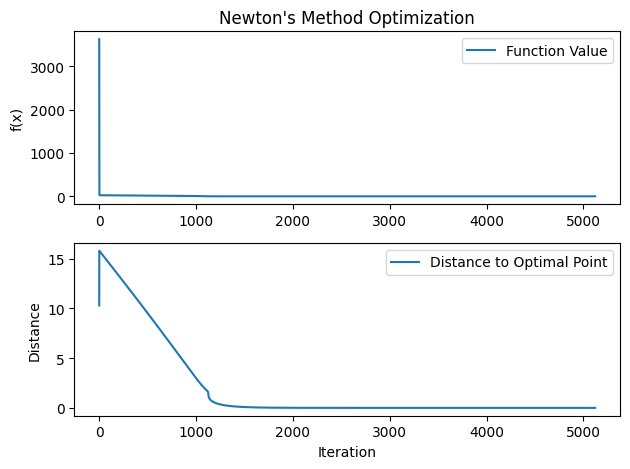

In [39]:
x0 = np.array([-4.0, 10.0])
lr = 0.0001
tol = 1e-9
max_iter = 200000

x_sd, traj_sd = steepest_descent(x0, lr, tol, max_iter)

x_nm, traj_nm = newton_method(x0, tol, max_iter)

print("Steepest Descent Result:", x_sd)
print("Newton's Method Result:", x_nm)


plot_optimization(traj_sd, 'Steepest Descent')
plot_optimization(traj_nm, "Newton's Method")


## Part D


- We can combine the two methods like this. First we start with the steepest descent which is better for the start and farther points. Then after some iterations (I used half of the whole iterations) we change to the newthon method which is better for closer points. This method is called Hybrid method and is very usefull for us.

### Hybrid Optimization

In [40]:
def hybrid_optimization(x0, lr, tol, max_iter, switch_iter):
    x = x0
    trajectory = [x]
    for i in range(max_iter):
        grad = grad_f(x)
        if i < switch_iter:
            # Steepest Descent step
            x = x - lr * grad
        else:
            # Newton's Method step
            hessian = hessian_f(x)
            try:
                delta_x = np.linalg.solve(hessian, grad)
            except np.linalg.LinAlgError:
                print("Hessian is non-invertible at iteration:", i)
                break
            x = x - delta_x
        trajectory.append(x)
        if np.linalg.norm(grad) < tol:
            break
    return x, trajectory



### Results

- As you can see after 50000 iterations which is a quarter of the previous parts we got to the optimal point.

Hybrid Optimization Result: [1. 1.]


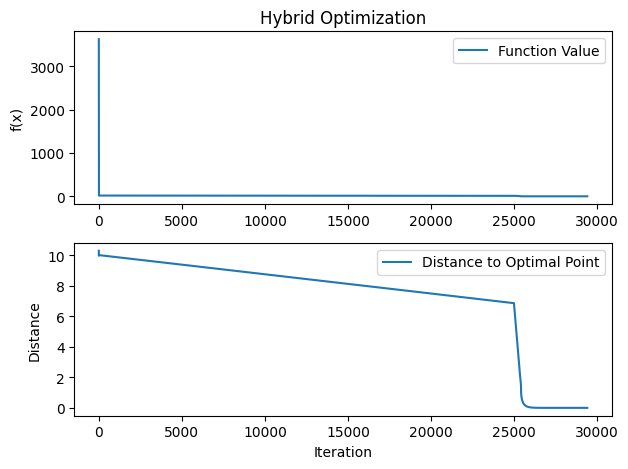

In [41]:
x0 = np.array([-4.0, 10.0])
lr = 0.0001
tol = 1e-9
max_iter = 50000
switch_iter = 25000

x_hybrid, traj_hybrid = hybrid_optimization(x0, lr, tol, max_iter, switch_iter)

print("Hybrid Optimization Result:", x_hybrid)

plot_optimization(traj_hybrid, 'Hybrid')
